# Example notebook for basic reading and plotting of FRESCO data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm import tqdm

In [2]:
# Unzip sample data provided with the repository.
# Otherwise, skip this step and use directly the uncompressed data from FRESCO

!unzip data_sample.zip -d ./

Archive:  data_sample.zip
   creating: ./2024/
   creating: ./2024/07/
   creating: ./2024/07/14/
  inflating: ./2024/07/14/DATA.TXT   
   creating: ./2024/07/15/
  inflating: ./2024/07/15/DATA.TXT   
   creating: ./2024/07/16/
  inflating: ./2024/07/16/DATA.TXT   
   creating: ./2024/07/17/
  inflating: ./2024/07/17/DATA.TXT   


In [3]:
# Define utility function to navigate through the data folder tree and collate
# all the relevant days into a single ASCII file "DATA_collated.txt"

def read_data_from_folders(start_day, start_month, start_year, end_day, end_month, end_year):
    file_paths = []
    for year in range(start_year, end_year + 1):
        for month in range(start_month, 13):
            for day in range(start_day, 32):
        # for month in range(start_month, end_month + 1):
        #     for day in range(start_day, end_day + 1):
                folder_path = os.path.join(f"{year:04d}", f"{month:02d}", f"{day:02d}")
                if os.path.exists(folder_path):
                    file_path = os.path.join(folder_path, "DATA.TXT")
                    if os.path.exists(file_path):
                        file_paths.append(file_path)

    outfname = "DATA_collated.txt"
    lines_seen = set() # hold lines already seen once (i.e., the headers)
    with open(outfname, "w") as outfile:
        for file_path in file_paths:
            for line in open(file_path, "r"):
                if line not in lines_seen:
                    outfile.write(line)
                    lines_seen.add(line)

In [4]:
# Define start and end date and generate a single data file

start_day, start_month, start_year = 14, 7, 2024
end_day, end_month, end_year = 17, 7, 2024

read_data_from_folders(start_day, start_month, start_year, end_day, end_month, end_year)

In [5]:
# Read the data into a pandas DataFrame

df = pd.read_csv("DATA_collated.txt", header=0, index_col=0, skipinitialspace=True, parse_dates=True, dayfirst=True)
pd.to_datetime(df.index)
df.describe()

,TA1,H1,TA2,H2,TA3,H3,TS1,TS2,TS3,TS4,Tbx,Tbr,Ir,TAIR,TSIR,PD1,TPC1,PD2,TPC2,TSet1
count,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000,245357.000000
mean,28.375982,52.887766,30.018872,48.252193,29.015227,45.312526,26.698523,26.080086,27.891484,28.126671,27.453438,39.911056,362.545415,29.981777,5.291852,54.429815,28.720621,44.164553,28.980217,28.375349
std,5.804652,10.447118,7.059724,12.302929,6.034543,13.434877,8.766272,8.640640,8.896851,9.026030,8.328349,3.735716,362.602157,8.080581,3.612597,46.498879,6.487716,41.276540,6.679496,5.807456
min,19.500000,34.700000,18.400000,30.100000,19.500000,24.100000,14.160000,13.660000,15.340000,15.040000,15.340000,31.060000,0.000000,17.710000,-1.130000,0.000000,18.380000,0.000000,18.040000,0.000000
25%,23.300000,43.000000,23.200000,37.500000,23.600000,32.600000,18.680000,18.090000,19.760000,19.660000,19.660000,36.880000,0.000000,22.590000,2.390000,0.000000,23.010000,0.000000,23.050000,23.300000
50%,28.000000,52.600000,30.500000,45.600000,28.600000,44.000000,24.340000,24.040000,25.560000,26.270000,25.960000,40.630000,290.250000,28.670000,4.570000,65.420000,27.770000,46.330000,28.020000,28.000000
75%,34.200000,61.500000,36.700000,59.100000,35.000000,56.200000,35.790000,35.110000,37.160000,37.730000,36.010000,42.750000,738.490000,38.310000,8.690000,95.030000,35.110000,78.270000,35.390000,34.200000
max,39.500000,74.000000,41.700000,75.700000,39.200000,74.300000,41.810000,40.580000,42.940000,43.570000,41.440000,48.560000,964.760000,45.170000,14.210000,396.000000,39.980000,395.550000,41.320000,39.400000


In [6]:
# Apply some rolling average for better readability

rw = '15min'
dfroll = df.rolling(window=rw).mean()
pd.set_option('plotting.backend', 'matplotlib')

dfroll['ΔT1'] = dfroll['TS1'] - dfroll['TA1']
dfroll['ΔT2'] = dfroll['TS2'] - dfroll['TA1']
dfroll['ΔT3'] = dfroll['TS3'] - dfroll['TA1']
dfroll['ΔT4'] = dfroll['TS4'] - dfroll['TA1']
dfroll['ΔTbx'] = dfroll['Tbx'] - dfroll['TA1']

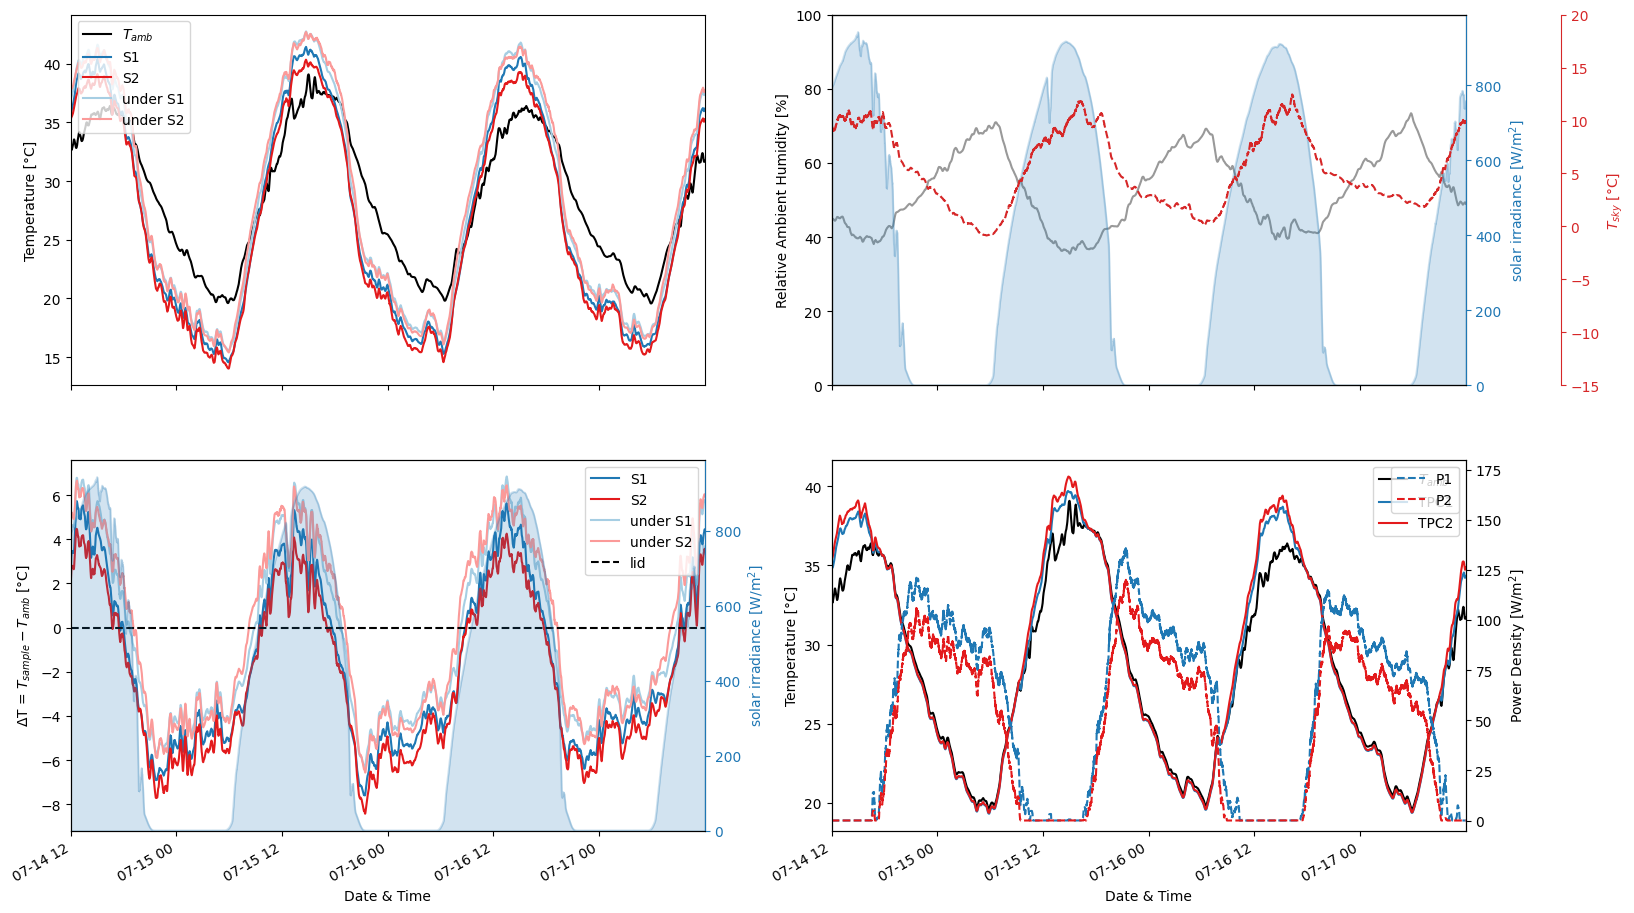

In [7]:
# Define color palette
drkbl = '#1F78B4'
lgtbl = '#A6CEE3'
drkrd = '#E31A1C'
lgtrd = '#FB9A99'
drkgr = '#33A02C'
lgtgr = "#B2DF8A"

# Assuming that you have connected TS1 and TS2 to samples 1 and 2 and TS3 and TS4 below samples 1 and 2
colors = {
    'TA1': 'black',               # Ambient temperature
    'RH': '#999999',              # Ambient humidity (changed from black)
    'Tbx': drkgr,                 # Lid temperature (distinct green)
    'TS1': drkbl, 'TS2': drkrd,   # Sample temperatures
    'ΔT1': drkbl, 'ΔT2': drkrd,
    'PD1': drkbl, 'PD2': drkrd,   # Power densities
    'TS3': lgtbl, 'TS4': lgtrd,   # Temperature under the samples
    'ΔT3': lgtbl, 'ΔT4': lgtrd,
    'ΔTbx': drkgr,                # Lid temperature difference
}


fig, axarr = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(18,12))
# Temperature (skip Tbx for better readability)
dfroll.plot(ax=axarr[0, 0], y=['TA1', 'TS1', 'TS2', 'TS3', 'TS4'],
            color=[colors[key] for key in ['TA1', 'TS1', 'TS2', 'TS3', 'TS4']])
axarr[0, 0].legend(['$T_{amb}$','S1','S2','under S1','under S2'], loc='upper left')
axarr[0, 0].set_ylabel('Temperature [°C]')
axarr[0, 0].autoscale(enable=True, axis='x', tight=True)

# Irradiance, Sky temperature and Relative humidity
ax_irr = axarr[0, 1].twinx()
dfroll.plot(ax=axarr[0, 1], y=['H1'], ylim=(0, 100),
            legend=False, color=colors['RH'])
axarr[1, 1].set_xlabel('Date & Time')

dfroll.plot.area(ax=ax_irr, y='Ir', alpha=0.2, legend=False)
ax_irr.set_ylabel('solar irradiance [W/m$^2$]', color='#1f77b4')
ax_irr.spines['right'].set_color('#1f77b4')
ax_irr.tick_params(axis='y', colors='#1f77b4')
axarr[0, 1].set_ylabel('Temperature [°C]')
axarr[0, 1].set_ylabel('Relative Ambient Humidity [%]')
axarr[0, 1].autoscale(enable=True, axis='x', tight=True)

ax_sky = axarr[0, 1].twinx()
dfroll.plot(ax=ax_sky, y='TSIR', ylim=(-15, 20),
            color='#d62728', legend=False, linestyle='--')
ax_sky.set_ylabel('$T_{sky}$ [°C]', color='#d62728')
ax_sky.spines['right'].set_color('#d62728')
ax_sky.spines['right'].set_position(("axes", 1.15))
ax_sky.tick_params(axis='y', colors='#d62728')

# Temperature difference with ambient temperature
ax_dif = axarr[1, 0].twinx()
dfroll.plot(ax=axarr[1, 0], y=['ΔT1', 'ΔT2', 'ΔT3', 'ΔT4'],
            color=[colors[key] for key in ['ΔT1', 'ΔT2', 'ΔT3', 'ΔT4']])
dfroll.plot.area(ax=ax_dif, y='Ir', alpha=0.2, legend=False)
axarr[1, 0].axhline(0, ls='--', c='k')
axarr[1, 0].set_ylabel('ΔT = $T_{sample} - T_{amb}$ [°C]')
ax_dif.set_ylabel('solar irradiance [W/m$^2$]', color='#1f77b4')
axarr[1, 0].set_xlabel('Date & Time')
axarr[1, 0].legend(['S1','S2','under S1','under S2','lid'], loc='upper right')
ax_dif.spines['right'].set_color('#1f77b4')
ax_dif.tick_params(axis='y', colors='#1f77b4')
axarr[1, 0].autoscale(enable=True, axis='x', tight=True)

# Cooling power densities
dfroll.plot(ax=axarr[1, 1], y=['TA1', 'TPC1', 'TPC2'],
            color=['black', colors['TS1'], colors['TS2']])
axarr[1, 1].set_ylabel('Temperature [°C]')

ax_pow = axarr[1, 1].twinx()
dfroll.plot(ax=ax_pow, y=['PD1', 'PD2'],
            color=[colors['PD1'], colors['PD2']], linestyle='--')
plt.ylim(-5, 180)
axarr[1, 1].set_xlabel('Date & Time')
ax_pow.set_ylabel('Power Density [W/m$^2$]')

axarr[1, 1].legend(['$T_{amb}$', 'TPC1', 'TPC2'])
ax_pow.legend(['P1', 'P2'])
axarr[1, 1].autoscale(enable=True, axis='x', tight=True)

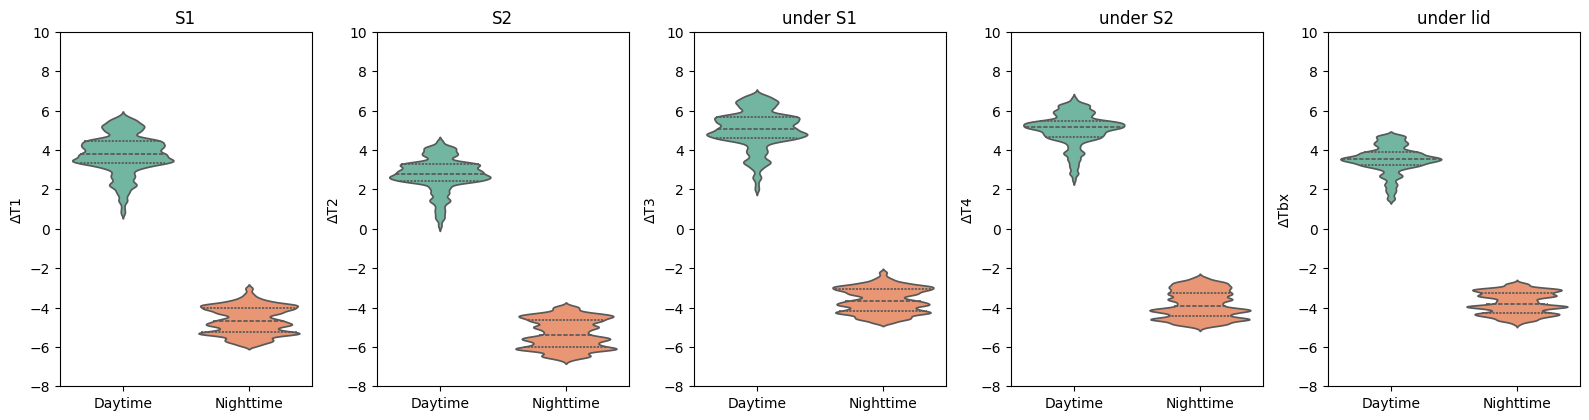

In [8]:
# Define time ranges for nighttime and daytime
day_start_hour, day_end_hour = 11, 16
night_start_hour, night_end_hour = 0, 5

# Create daytime and nighttime masks
day_mask = (dfroll.index.hour >= day_start_hour) & (dfroll.index.hour < day_end_hour)
night_mask = (dfroll.index.hour >= night_start_hour) & (dfroll.index.hour < night_end_hour) if night_start_hour < night_end_hour else (dfroll.index.hour >= night_start_hour) | (dfroll.index.hour < night_end_hour)

# Filter NaN values for each column
column_names = ["ΔT1", "ΔT2", "ΔT3", "ΔT4", "ΔTbx"]
titles = ['S1', 'S2', 'under S1', 'under S2', 'under lid']
daytime_data = {col: dfroll.loc[day_mask, col].dropna() for col in column_names}
nighttime_data = {col: dfroll.loc[night_mask, col].dropna() for col in column_names}

# Create violin plots
plt.figure(figsize=(16, 8))
for i, col in enumerate(column_names):
    plt.subplot(2, len(column_names), i + 1)
    sns.violinplot(x=["Daytime"] * len(daytime_data[col]) + ["Nighttime"] * len(nighttime_data[col]),
                   hue=["Daytime"] * len(daytime_data[col]) + ["Nighttime"] * len(nighttime_data[col]),
                   y=pd.concat([daytime_data[col], nighttime_data[col]]), inner="quartile", palette="Set2")
    plt.title(titles[i])
    plt.ylim(-8, 10)

plt.tight_layout()
plt.show()

In [9]:
# Get average values
for i, col in enumerate(column_names):
    print(f"{titles[i]}: \t mean daytime ΔT = {daytime_data[col].mean():.1f} \t mean nighttime ΔT = {nighttime_data[col].mean():.1f}")

S1: 	 mean daytime ΔT = 3.8 	 mean nighttime ΔT = -4.6
S2: 	 mean daytime ΔT = 2.8 	 mean nighttime ΔT = -5.3
under S1: 	 mean daytime ΔT = 5.0 	 mean nighttime ΔT = -3.6
under S2: 	 mean daytime ΔT = 5.0 	 mean nighttime ΔT = -3.8
under lid: 	 mean daytime ΔT = 3.5 	 mean nighttime ΔT = -3.8
